# To build a model for training and testing:

In [1]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [2]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dir_name_train_def_front = 'Data/train/def_front'
dir_name_train_ok_front = 'Data/train/ok_front'

In [5]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [6]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for different

 ====== Images in:  Data/train/def_front
images_count:	175
min_width:	300
max_width:	300
min_height:	300
max_height:	300



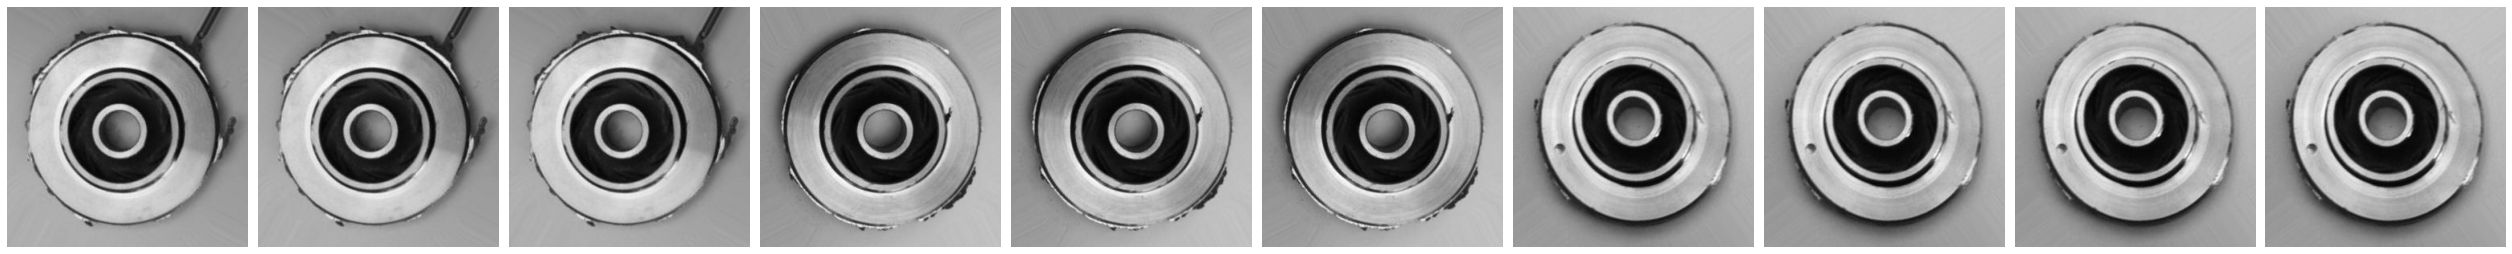

In [7]:
print("")
print("Trainned data for different")
print("")
Images_details(dir_name_train_def_front)
print("")
plot_images(dir_name_train_def_front, 10)


Trainned data for Normal

 ====== Images in:  Data/train/ok_front
images_count:	198
min_width:	300
max_width:	300
min_height:	300
max_height:	300



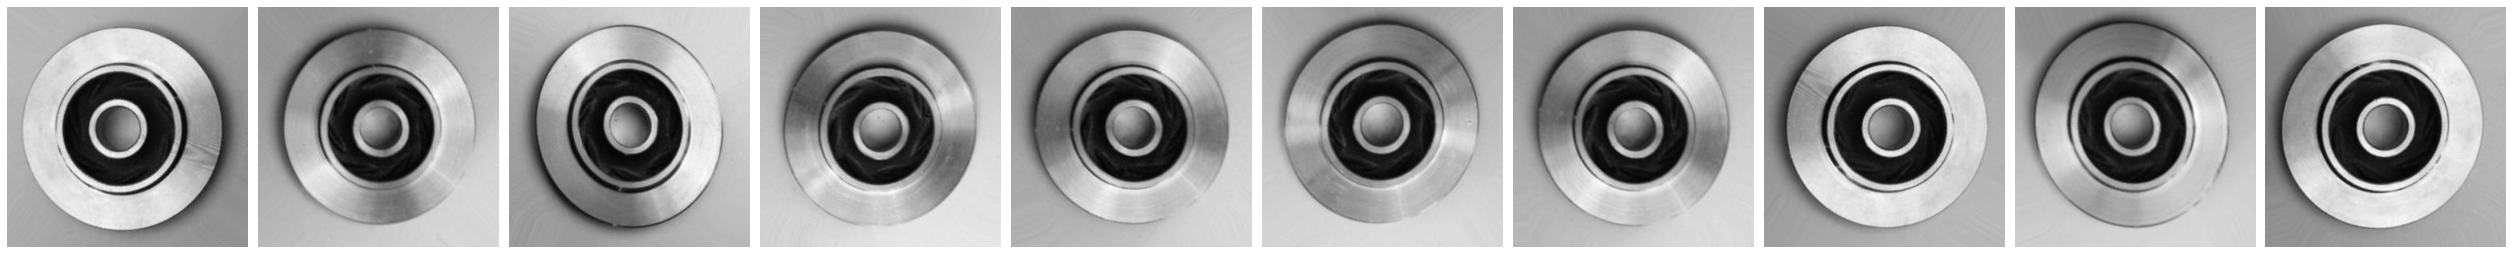

In [8]:
print("")
print("Trainned data for Normal")
print("")

Images_details(dir_name_train_ok_front)
print("")
plot_images(dir_name_train_ok_front, 10)

In [9]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))

In [10]:
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 38)                4826342   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 78        
Total params: 4,827,316
Trainable params: 4,827,316
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(128,128),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Data/test',target_size=(128,128),batch_size=32,class_mode='categorical')

Found 373 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


In [14]:
img_dims = 150
epochs = 10
batch_size = 32

In [15]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
11/11 [==============================] - 5s 440ms/step - loss: 6.6316 - accuracy: 0.5249 - val_loss: 7.8283 - val_accuracy: 0.4896
Epoch 2/10
11/11 [==============================] - 4s 369ms/step - loss: 7.1963 - accuracy: 0.5308 - val_loss: 7.3490 - val_accuracy: 0.5208
Epoch 3/10
11/11 [==============================] - 4s 365ms/step - loss: 7.1063 - accuracy: 0.5367 - val_loss: 7.8283 - val_accuracy: 0.4896
Epoch 4/10
11/11 [==============================] - 4s 396ms/step - loss: 7.4662 - accuracy: 0.5132 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 5/10
11/11 [==============================] - 4s 376ms/step - loss: 7.4212 - accuracy: 0.5161 - val_loss: 7.9881 - val_accuracy: 0.4792
Epoch 6/10
11/11 [==============================] - 4s 373ms/step - loss: 7.1893 - accuracy: 0.5312 - val_loss: 7.3490 - val_accuracy: 0.5208
Epoch 7/10
11/11 [==============================] - 4s 373ms/step - loss

In [16]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'],'go--')
    plt.plot(history.history['val_accuracy'],'yo--')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'],'go--')
    plt.plot(history.history['val_loss'],'yo--')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()


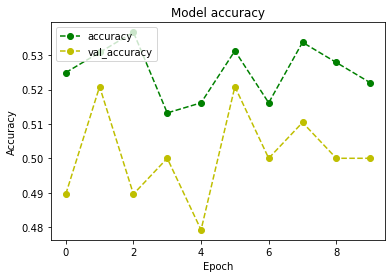

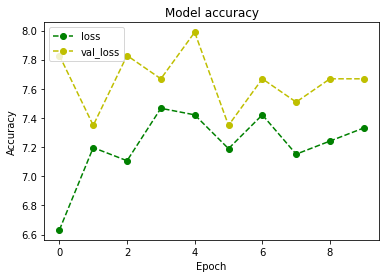

In [17]:
graph()